# モデル作成プログラム


## 100次元のモデル
flattenの次のdense層を4096から100に変更している。 エポック数も100から50に変更して学習を行った。

tensorflow.version 2.6.0

keras.version 2.6.0

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.initializers import TruncatedNormal, Constant
#追加train.py
from tensorflow.keras import utils as np_utils
from tensorflow.keras.optimizers import SGD 
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator


#alexnet_cifar10.py
def conv2d(filters, kernel_size, strides=(1, 1), padding='same', bias_init=1, **kwargs):
    trunc = TruncatedNormal(mean=0.0, stddev=0.01)
    cnst = Constant(value=bias_init)
    return Conv2D(
        filters, kernel_size, strides=strides, padding=padding,
        activation='relu', kernel_initializer=trunc, bias_initializer=cnst, **kwargs
    )   

def dense(units, activation='tanh'):
    trunc = TruncatedNormal(mean=0.0, stddev=0.01)
    cnst = Constant(value=1)
    return Dense(
        units, activation=activation,
        kernel_initializer=trunc, bias_initializer=cnst,
    )   

def AlexNet(image_size, channel, num_classes):
    model = Sequential()

    #conv1
    model.add(conv2d(96, 3, bias_init=0, input_shape=(image_size, image_size, channel)))
    #pool1
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())

    #conv2
    model.add(conv2d(256, 5)) 
    #pool2
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())

    #conv3
    model.add(conv2d(384, 3, bias_init=0))
    #conv4
    model.add(conv2d(384, 3)) 
    #conv5
    model.add(conv2d(256, 3)) 
    #pool5
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())

    #fc6
    model.add(Flatten())
    model.add(dense(100))
    model.add(Dropout(0.5))
    #fc7
    model.add(dense(100))
    model.add(Dropout(0.5))

    #fc8
    model.add(dense(num_classes, activation='softmax'))
    
    return model

#train.py

batch_size = 128 
num_classes = 10
epochs = 50 
image_size = 32
channel = 3 

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

model = AlexNet(image_size, channel, num_classes)
model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

train_gen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                width_shift_range=4.0/32.0, height_shift_range=4.0/32.0)
test_gen = ImageDataGenerator(rescale=1.0/255)

history = model.fit_generator(train_gen.flow(x_train, y_train, batch_size, shuffle=True),
                        steps_per_epoch=x_train.shape[0]//batch_size,
                        validation_data=test_gen.flow(x_test, y_test, batch_size, shuffle=False),
                        validation_steps=x_test.shape[0]//batch_size,
                        max_queue_size=5, epochs=epochs)

170508288/170498071 [==============================] - 6s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 96)        2688      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:93: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
390/390 [==============================] - 77s 114ms/step - loss: 2.3057 - accuracy: 0.0990 - val_loss: 2.3030 - val_accuracy: 0.1002
Epoch 2/50
390/390 [==============================] - 43s 109ms/step - loss: 2.3025 - accuracy: 0.1063 - val_loss: 2.2977 - val_accuracy: 0.1002
Epoch 3/50
390/390 [==============================] - 42s 108ms/step - loss: 2.2366 - accuracy: 0.1490 - val_loss: 2.1370 - val_accuracy: 0.1670
Epoch 4/50
390/390 [==============================] - 43s 110ms/step - loss: 1.9725 - accuracy: 0.1934 - val_loss: 2.0848 - val_accuracy: 0.1798
Epoch 5/50
390/390 [==============================] - 43s 110ms/step - loss: 1.8935 - accuracy: 0.2072 - val_loss: 1.8529 - val_accuracy: 0.2220
Epoch 6/50
390/390 [==============================] - 42s 107ms/step - loss: 1.8565 - accuracy: 0.2231 - val_loss: 2.0686 - val_accuracy: 0.2059
Epoch 7/50
390/390 [==============================] - 41s 106ms/step - loss: 1.8252 - accuracy: 0.2554 - val_loss: 1.7378 - val_ac

In [2]:
model.save('alexnet_cifar10_100.h5')

In [3]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

学習結果を図に表示

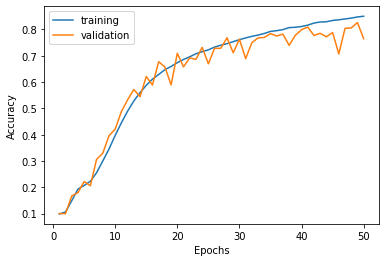

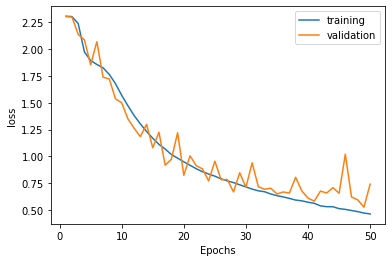

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.plot(range(1, epochs+1), history.history['accuracy'], label="training")
plt.plot(range(1, epochs+1), history.history['val_accuracy'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(range(1, epochs+1), history.history['loss'], label="training")
plt.plot(range(1, epochs+1), history.history['val_loss'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()